In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

In [2]:
# Reset the pseudo random number generator to the same value.
seed = 1234
np.random.seed(seed)
random.seed(seed)

### Definição de funções úteis.

In [3]:
def calculateErrorSurface(x1, x2, y):
    '''Generate data points for plotting the error surface.'''
    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-12.0, 14.0, M)
    a2 = np.linspace(-12.0, 14.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            J[iter1, iter2] = (1.0/len(y))*np.sum(np.square(y - yhat))           
            
    return J, A1, A2

def calculateClosedFormSolution(X, y):
    """Calculate closed-form solution using the normal equation."""
    # Get the number of examples.
    N = len(y)
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/N)*np.sum(np.power((y - yhat), 2))
    
    return Joptimum, a_opt

def gradientDescentMiniBatch(X, y_noisy, n_epochs, mb_size):
    '''Mini-batch gradient descent implementation.'''
    
    # Retrieve the number of samples.
    N = len(y_noisy)
    
    # Initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*(N//mb_size)+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*(N//mb_size)+1)

    # Initial MSE.
    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Create array for storing gradient values.
    grad_hist = np.zeros((2, n_epochs*(N//mb_size)))

    # Initiate the iteration counter.
    inc = 0
    
    # Mini-batch gradient-descent loop: iterate over the epochs.
    for e in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)

        # Iterate over the iterations, one mini-batch at a time.
        for i in range(0, N//mb_size):

            # Selecting a mini-batch.
            start = i*mb_size
            end = mb_size*(i+1)
            batch_indexes = shuffled_data_set_indexes[start:end]

            # Pick the samples composing the mini-batch.
            xmb = X[batch_indexes]
            ymb = y_noisy[batch_indexes]

            # Calculate the gradient approximation.
            gradients = -(2.0/mb_size)*xmb.T.dot(ymb - xmb.dot(a))
            
            # Weights' update. 
            a = a - alpha*gradients

            # Calculate per iteration error.
            Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            # Store history.
            grad_hist[:, inc] = gradients.reshape(2,)
            a_hist[:, inc+1] = a.reshape(2,)

            # Increment the iteration.
            inc = inc + 1
            
    return a, Jgd, a_hist, grad_hist, inc

### Gerando a função observável.

A **função objetivo** utilizada nesse exemplo é dada por

$${y} = {a}_1 x_1 + {a}_2 x_2,$$

e a **função observável** é dada por

$$y_{noisy} = y + w.$$

In [4]:
# Define the number of examples.
N = 1000

# Attributes.
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Target/true function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Observable function (noisy).
y_noisy = y + w

### Plotando as funções objetivo e observável.

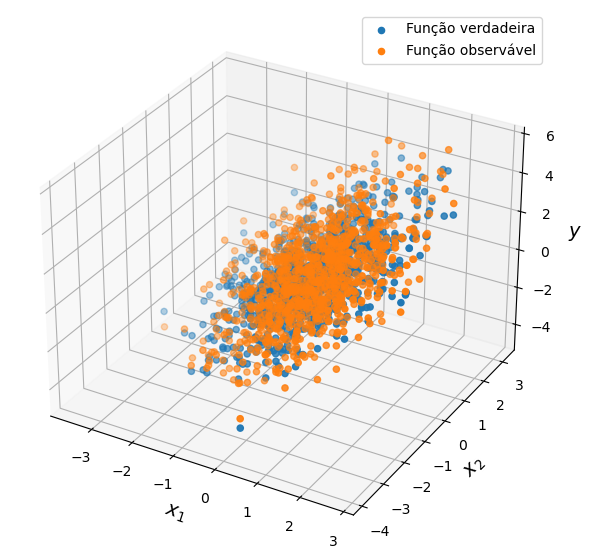

In [5]:
# Plot observable function.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
ax.scatter(x1,x2,y, label='Função verdadeira')
ax.scatter(x1,x2,y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)
plt.legend()
plt.show()

### Encontrando a solução ótima com a equação normal.

A **função hipótese** utilizada nesse exemplo é dada por

$$\hat{y} = \hat{a}_1 x_1 + \hat{a}_2 x_2,$$

a qual pode ser reescrita em formato matricial como

$$\hat{\textbf{y}} = \textbf{X}\hat{\textbf{a}}, $$

onde $\textbf{X}$ é a matriz de atributos, contendo em cada coluna os valores dos atributos, e $\hat{\textbf{a}}$ é o vetor contendo as aproximações dos pesos (i.e., $\hat{a}_1$ e $\hat{a}_2$).

In [6]:
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X, y_noisy)

# Print a1 and a2 weights.
print('peso a1:', a_opt[0, 0])
print('peso a2:', a_opt[1, 0])
# Plot the MSE.
print('Erro:', Joptimum)

peso a1: 1.0373518580863197
peso a2: 1.0549021717423768
Erro: 0.9809577522249409


### Plotando a superfície de erro.

Como os atributos têm intervalos de valores semelhantes, a superfície de erro terá o formato de tigela, com erro variando igualmente em ambas as direções.

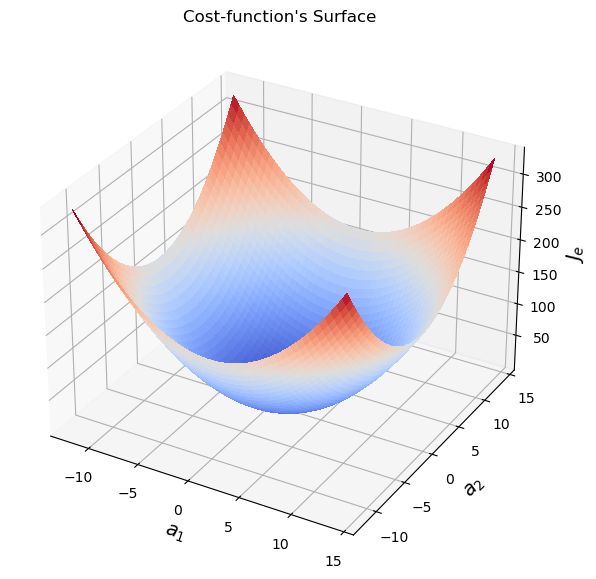

In [7]:
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy)

# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
# Save figure.
#plt.savefig("error_surface_mb_gd.png", dpi=600)

# Show the plot.
plt.show()

### Encontrando os pesos com o gradiente descendente em mini-batch.

In [8]:
# Number of epochs.
n_epochs = 1
# Learning rate.
alpha = 0.2

# Mini-batch size.
mb_size = 1
#mb_size = 100
#mb_size = N # Aumentar n_epochs para 100 para que algoritmo convirja.

# Call function that implements the mini-batch.
a, Jgd, a_hist, grad_hist, inc = gradientDescentMiniBatch(X, y_noisy, n_epochs, mb_size)

### Plotando a superfície de contorno.

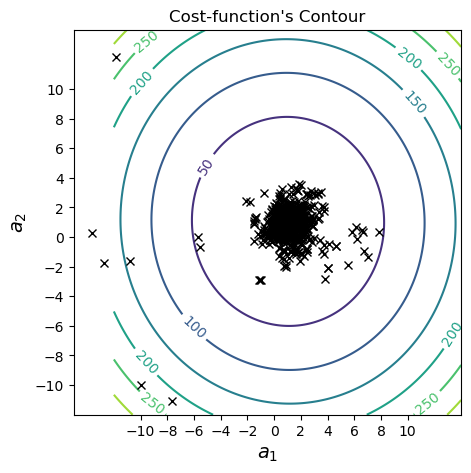

In [9]:
# Plot contour figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
#plt.savefig("error_contour_mb_gd.png", dpi=600)
plt.show()

+ Conforme o mini-batch ($\text{MB}$) aumenta, o progresso se torna menos irregular do que com o GDE.


+ Como resultado, as atualizações dos pesos oscilam menos ao redor do mínimo global do que o GDE.

### Comparando os valores dos pesos.

In [10]:
# Print found values.
print('Pesos encontrados com a equação normal:')
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))
print('')

print('Pesos encontrados com o MB:')
print('a0_mb: ' + str(a[0, 0]))
print('a1_mb: ' + str(a[1, 0]))

Pesos encontrados com a equação normal:
a0_opt: 1.0373518580863197
a1_opt: 1.0549021717423768

Pesos encontrados com o MB:
a0_mb: 0.312631394949639
a1_mb: -0.2747143436711339


+ Com $\text{MB}=1$, temos a versão estocástica do gradiente. Atualizações são irregulares (i.e., não seguem a direção de máxima declividade) e não há convergência (i.e., pesos ficam oscilando em torno do ponto de mínimo).
    * Valores finais dos pesos estão longe do ponto ótimo.
    

+ Conforme usa-se um número maior de amostras para estimar o vetor gradiente, as atualizações se tornam mais regulares, seguindo a direção de máxima declividade e aumenta-se a chance de convergência, pois as atualizações dos pesos oscilam menos ao redor do mínimo.
    * Valores finais dos pesos ficam mais próximos dos ótimos.

### Plotando MSE em função das iterações.

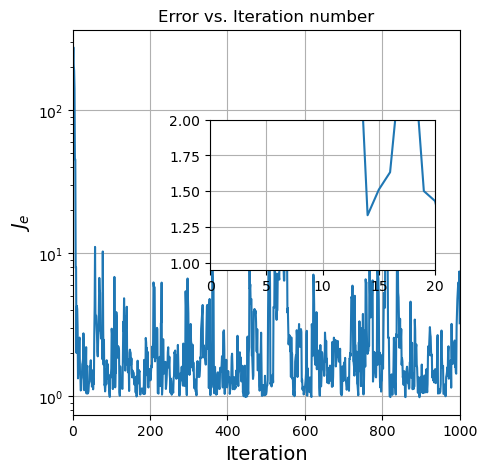

In [11]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim((0, inc+1))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
plt.grid()

left, bottom, width, height = [0.4, 0.4, 0.45, 0.3]
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(np.arange(0, inc+1), Jgd[0:inc+1])
ax1.set_xlim(0, 20)
ax1.set_ylim(0.95, 2)
ax1.grid()

#plt.savefig("error_vs_iteration_mb_gd.png", dpi=600)
plt.show()

+ Tempo de treinamento é menor quando comparado com o batelada $\text{MB} = N$, mas maior do que o estocástico se $\text{MB} > 1$.


+ A convergência (i.e., erro tender ao menor valor possível e estabilizar) nunca ocorre quando $\text{MB}$ é pequeno e temos amostras corrompidas por ruído.


+ Conforme $\text{MB}$ aumenta, a variação do erro diminui e a chance de convergência aumenta.

### Plotando a variação do gradiente ao longo das iterações.

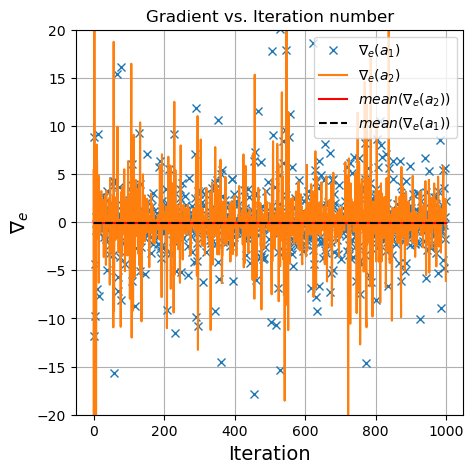

In [12]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc), grad_hist[0,0:inc], 'x', label='$\\nabla_{e}(a_1)$')
plt.plot(np.arange(0, inc), grad_hist[1,0:inc], label='$\\nabla_{e}(a_2$)')
plt.plot(np.arange(0, inc), np.mean(grad_hist[1,0:inc])*np.ones(inc), 'r', label='$mean(\\nabla_{e}(a_2))$')
plt.plot(np.arange(0, inc), np.mean(grad_hist[0,0:inc])*np.ones(inc), 'k--', label='$mean(\\nabla_{e}(a_1))$')
plt.ylim([-20, 20])
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$\\nabla_e$', fontsize=14)
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.grid()
plt.show()

+ Para valores pequenos de $\text{MB}$, a convergência ocorre apenas na média.
    * Nesses casos, algumas técnicas podem ser usadas para torna-lo mais comportado e talvez convergir: redução do passo, early-stop, momentum, etc.


+ Conforme $\text{MB}$ aumenta, os gradientes se tornam menos ruidosos e a chance de convergência aumenta.